In [121]:
%config IPCompleter.greedy=True # Enable basic intellisense

from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np

In [15]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign colum names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
iris = pd.read_csv(url, names=names)

In [16]:
iris.head()

sepal-length  sepal-width  petal-length  petal-width        Class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [17]:
iris.describe()

sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

In [18]:
iris_setosa=dataset.loc[iris["Class"]=="Iris-setosa"]
iris_virginica=dataset.loc[iris["Class"]=="Iris-virginica"]
iris_versicolor=dataset.loc[iris["Class"]=="Iris-versicolor"]

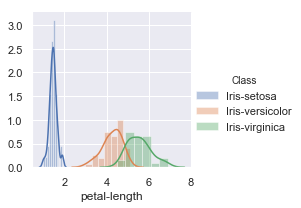

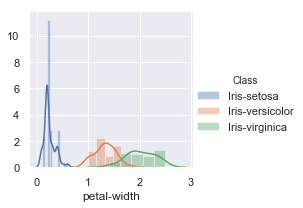

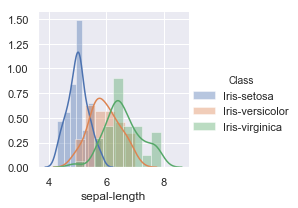

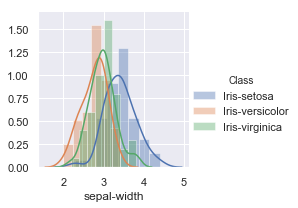

In [22]:
sns.FacetGrid(iris,hue="Class",height=3).map(sns.distplot,"petal-length").add_legend()
sns.FacetGrid(iris,hue="Class",height=3).map(sns.distplot,"petal-width").add_legend()
sns.FacetGrid(iris,hue="Class",height=3).map(sns.distplot,"sepal-length").add_legend()
sns.FacetGrid(iris,hue="Class",height=3).map(sns.distplot,"sepal-width").add_legend()
plt.show()

C:\Users\Tijmen\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


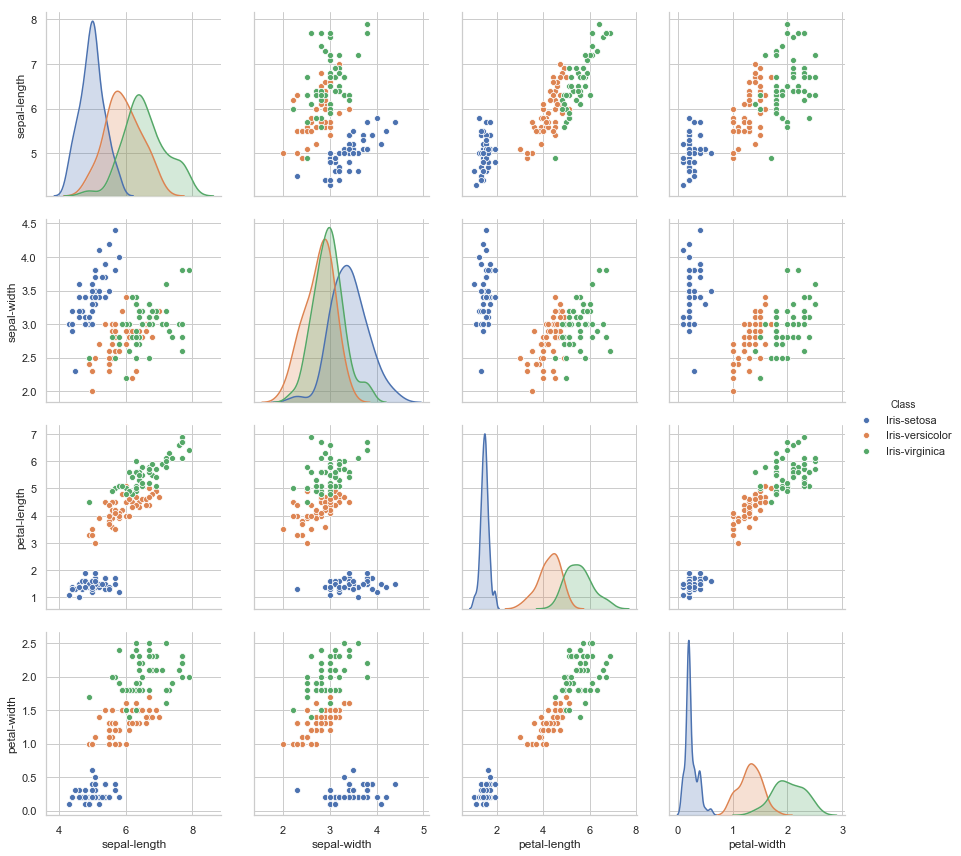

In [24]:
sns.set_style("whitegrid")
sns.pairplot(iris,hue="Class",size=3);
plt.show()

In [25]:
iris.corr() # Correlation matrix

sepal-length  sepal-width  petal-length  petal-width
sepal-length      1.000000    -0.109369      0.871754     0.817954
sepal-width      -0.109369     1.000000     -0.420516    -0.356544
petal-length      0.871754    -0.420516      1.000000     0.962757
petal-width       0.817954    -0.356544      0.962757     1.000000

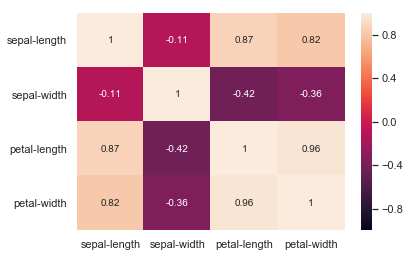

In [32]:
sns.heatmap(iris.corr(), annot=True, vmin=-1, vmax=1) # Correlation heatmap

In [36]:
X = dataset.iloc[:, :-1].values # Last collumn
y = dataset.iloc[:, 4].values # Other collumns

In [37]:
from sklearn.model_selection import train_test_split

# Split into test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0) 

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train) # Fit scaler to data
# Scaled can be reused for new data

X_train = scaler.transform(X_train) # Scale training inputs
X_test = scaler.transform(X_test)   # Scale test inputs

In [299]:
#multi_class{‘auto’, ‘ovr’, ‘multinomial’}, default=’auto’
lr = LogisticRegression()

lr.fit(X_train, y_train)

C:\Users\Tijmen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tijmen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [301]:
print("Classes: ", lr.classes_)
classes = lr.classes_
print("Coefficients: ", lr.coef_)
coef = lr.coef_
print("Intercept: ", lr.intercept_)
intercept = lr.intercept_

Classes:  ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
Coefficients:  [[-0.72044074  1.29909362 -1.62428694 -1.46136445]
 [-0.11204582 -1.14230167  0.81255397 -0.75535923]
 [ 0.19964766 -0.08234065  1.65150049  2.4995041 ]]
Intercept:  [-1.62036016 -0.99525833 -2.20078553]


In [304]:
y_pred = lr.predict(X_test)
print("setosa, versicolor, virginica")
confusion_matrix(y_test, y_pred)

setosa, versicolor, virginica


array([[11,  0,  0],
       [ 0, 10,  3],
       [ 0,  1,  5]], dtype=int64)

In [97]:
#flowers = iris.iloc[0:2, :4].values
flowers = X_test
flowers

array([[-0.09544771, -0.58900572,  0.72247648,  1.51195265],
       [ 0.14071157, -1.98401928,  0.10361279, -0.29851096],
       [-0.44968663,  2.66602591, -1.35915595, -1.3330616 ],
       [ 1.6757469 , -0.35650346,  1.39760052,  0.73603967],
       [-1.04008484,  0.80600783, -1.30289562, -1.3330616 ],
       [ 0.49495049,  0.57350557,  1.22881951,  1.64127148],
       [-1.04008484,  1.03851009, -1.41541629, -1.20374277],
       [ 0.96726906,  0.10850105,  0.49743514,  0.34808318],
       [ 1.0853487 , -0.58900572,  0.55369548,  0.21876435],
       [ 0.25879121, -0.58900572,  0.10361279,  0.08944552],
       [ 0.25879121, -1.05401024,  1.00377816,  0.21876435],
       [ 0.61303014,  0.34100331,  0.38491447,  0.34808318],
       [ 0.25879121, -0.58900572,  0.49743514, -0.03987331],
       [ 0.73110978, -0.58900572,  0.4411748 ,  0.34808318],
       [ 0.25879121, -0.35650346,  0.49743514,  0.21876435],
       [-1.15816448,  0.10850105, -1.30289562, -1.46238043],
       [ 0.14071157, -0.

In [90]:
lr.predict(flowers)

array(['Iris-virginica', 'Iris-virginica'], dtype=object)

In [227]:
from math import e
def logReg(sample ,coef, intercept):
    Y = intercept
    for i in range(sample.shape[0]):
        Y += sample[i] * coef[i]
    return 1/(1+ e**-Y)

In [228]:
logReg(flowers[5], coef[2], intercept[2]) #Voorbeeld van een uitkomst

0.9817032958497511

In [229]:
regressionPrediction = []
for i in range(flowers.shape[0]):
    regressionPrediction.append([])
    for j in range(3):
        regressionPrediction[i].append(logReg(flowers[i], coef[j], intercept[j]))

In [230]:
manualPred = [] #Manually choosing the highest one

for i in range(len(l)):
    if (regressionPrediction[i][0] > regressionPrediction[i][1] and regressionPrediction[i][0] > regressionPrediction[i][2]):
        manualPred.append(classes[0])
    elif (regressionPrediction[i][1] > regressionPrediction[i][0] and regressionPrediction[i][1] > regressionPrediction[i][2]):
        manualPred.append(classes[1])
    elif (regressionPrediction[i][2] > regressionPrediction[i][0] and regressionPrediction[i][2] > regressionPrediction[i][1]):
        manualPred.append(classes[2])
manualPred = np.array(manualPred)

In [231]:
skPred = lr.predict(flowers) # Letting sklearn choose the highest one

In [232]:
print("{0: <18} {1}".format("sklearn", "Manual")) #Compare manual calculation vs sklearn
for i in range(manualPred.shape[0]):
    print("{0: <18} {1}".format(skPred[i], manualPred[i]))

sklearn            Manual
Iris-virginica     Iris-virginica
Iris-versicolor    Iris-versicolor
Iris-setosa        Iris-setosa
Iris-virginica     Iris-virginica
Iris-setosa        Iris-setosa
Iris-virginica     Iris-virginica
Iris-setosa        Iris-setosa
Iris-virginica     Iris-virginica
Iris-versicolor    Iris-versicolor
Iris-versicolor    Iris-versicolor
Iris-versicolor    Iris-versicolor
Iris-virginica     Iris-virginica
Iris-versicolor    Iris-versicolor
Iris-versicolor    Iris-versicolor
Iris-versicolor    Iris-versicolor
Iris-setosa        Iris-setosa
Iris-versicolor    Iris-versicolor
Iris-versicolor    Iris-versicolor
Iris-setosa        Iris-setosa
Iris-setosa        Iris-setosa
Iris-virginica     Iris-virginica
Iris-virginica     Iris-virginica
Iris-setosa        Iris-setosa
Iris-setosa        Iris-setosa
Iris-virginica     Iris-virginica
Iris-setosa        Iris-setosa
Iris-setosa        Iris-setosa
Iris-versicolor    Iris-versicolor
Iris-versicolor    Iris-versicolor
Iris-se

In [233]:
lr.predict(flowers[0:2])

array(['Iris-virginica', 'Iris-versicolor'], dtype=object)

In [261]:
# Logistic regression function with arbitrary standard values

from math import e
def logReg2(sample ,coef=.5, intercept=0):
    Y = intercept
    Y += sample * coef
    return 1/(1+ e**-Y)

In [262]:
def linReg(sample ,coef=.5, intercept=0):
    Y = intercept
    Y += sample * coef
    return Y

C:\Users\Tijmen\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


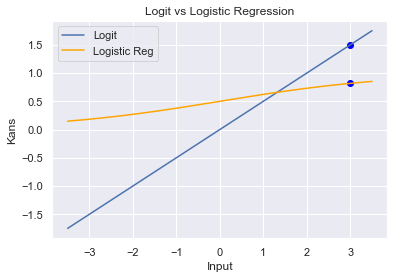

In [291]:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(-3.5, 3.5, 1000)
plt.plot(x, linReg(x), label="Logit")
plt.plot(x, logReg2(x), label="Logistic Reg", color="orange") # Visualising the standard Logistic Regression function
plt.scatter(3,linReg(3), color='blue')
plt.scatter(3,logReg2(3), color='blue')
#numbers=[[-2,'red'],[-1.5,'red'],[-1,'red'],[.5,'blue'],[1,'red'],[2,'blue'],[3,'blue']]
#for i in range(len(numbers)):
#    plt.scatter(numbers[i][0],logReg2(numbers[i][0]), color=numbers[i][1])

plt.title('Logit vs Logistic Regression')
plt.ylabel('Kans')
plt.xlabel('Input')
plt.legend(loc="upper left")

fig.show()

In [295]:
likelyhood = 1
for i in range(len(numbers)):
    print(logReg2(numbers[i][0]))
    likelyhood *= logReg2(numbers[i][0])
    

0.2689414213699951
0.320821300824607
0.3775406687981454
0.5621765008857981
0.6224593312018546
0.7310585786300049
0.8175744761936437


In [296]:
likelyhood

0.006813147706197409

In [305]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.91      0.77      0.83        13
 Iris-virginica       0.62      0.83      0.71         6

      micro avg       0.87      0.87      0.87        30
      macro avg       0.84      0.87      0.85        30
   weighted avg       0.89      0.87      0.87        30

